In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

from statsmodels.api

#importing seaborn for statistical plots
import seaborn as sns

In [3]:
df1 = pd.read_csv('Election.csv')

In [4]:
df2 =pd.read_csv('liedetector.csv')

In [5]:
df1.head()

,Unnamed: 0,Age,Gender,Average_Donation_1000,Household_members,Political_Party_Member,Region,Donation_Made
0,0,19,female,27.900,0,yes,South,16884.92400
1,1,18,male,33.770,1,no,South,1725.55230
2,2,28,male,33.000,3,no,South,4449.46200
3,3,33,male,22.705,0,no,North,21984.47061
4,4,32,male,28.880,0,no,North,3866.85520


In [6]:
df2.head()

,X1,X2,X3,X4,X5,X6
0,P_001,3.6216,8.6661,-2.8073,-0.44699,0
1,P_002,4.5459,8.1674,-2.4586,-1.46210,0
2,P_003,3.8660,-2.6383,1.9242,0.10645,0
3,P_004,3.4566,9.5228,-4.0112,-3.59440,0
4,P_005,0.2323,-4.4552,4.5718,-0.98880,0


0    814
1    558
Name: X6, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

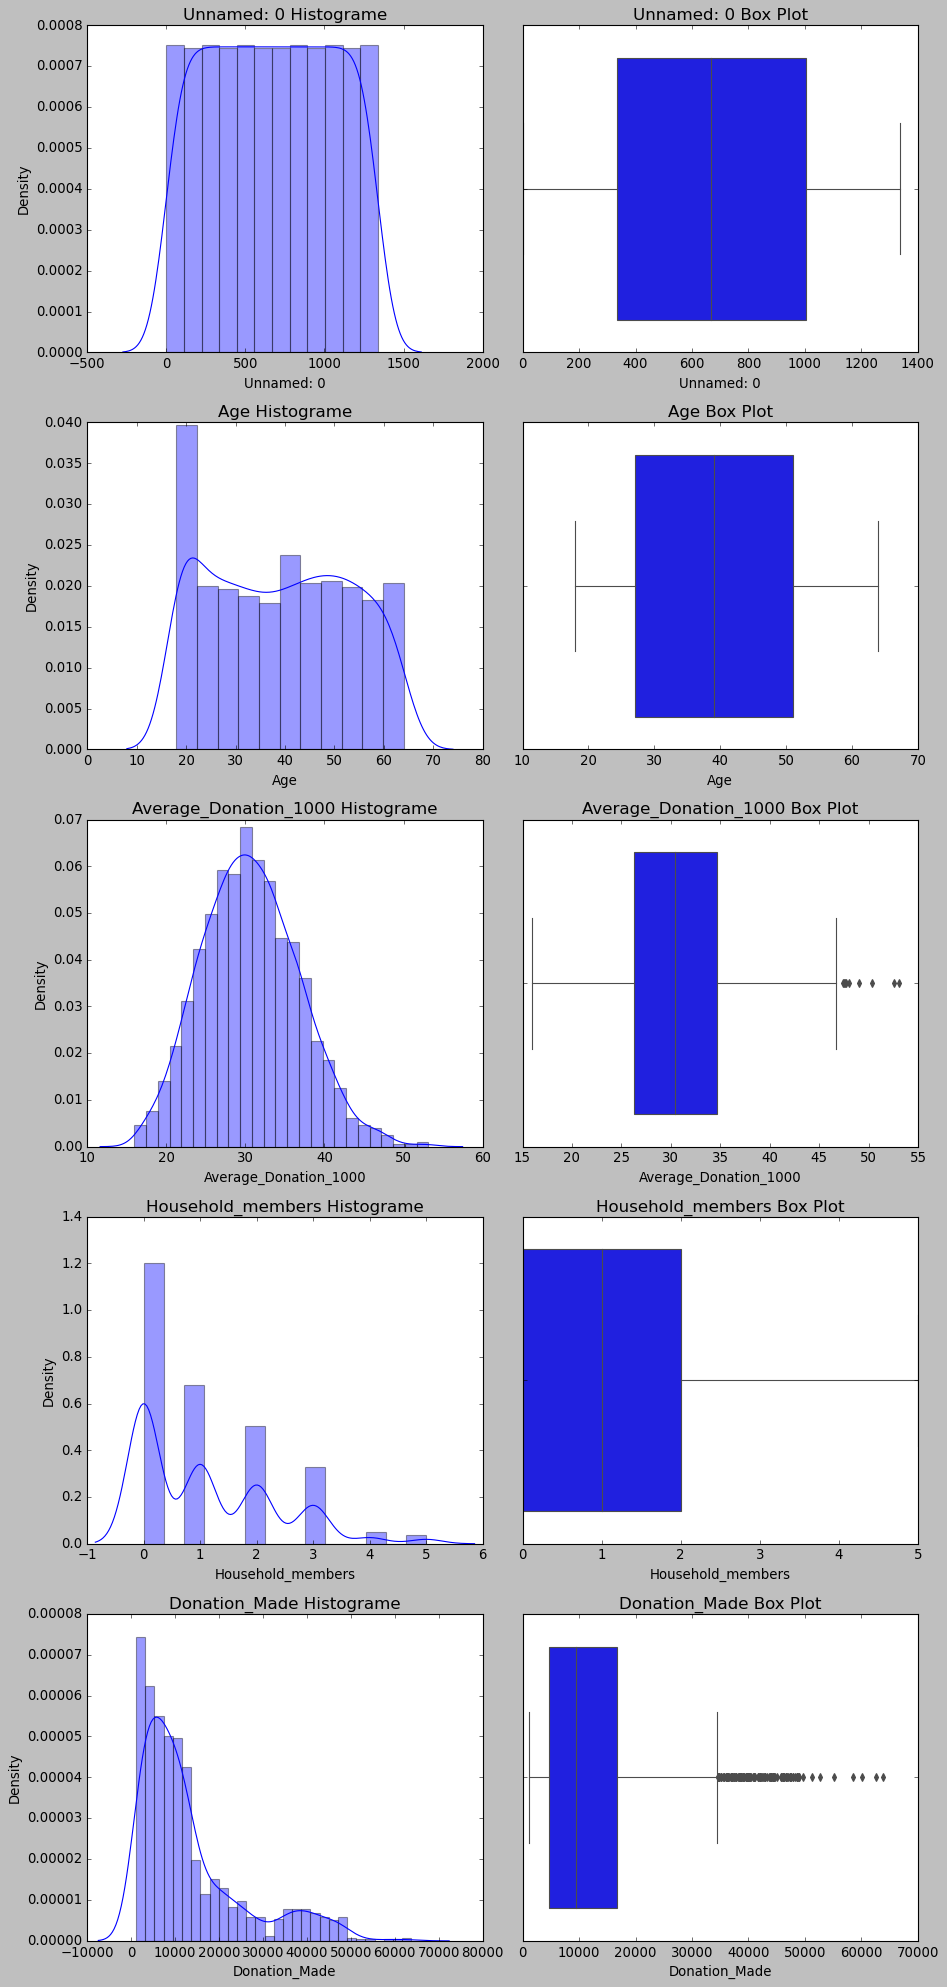

In [10]:
lstNumeric = list(df1.select_dtypes(exclude='object').columns)
lstNumeric
fig, axes = plt.subplots(nrows= len(lstNumeric),ncols=2)
fig.set_size_inches(12, 5*len(lstNumeric))
index = 0;
for i in lstNumeric:
    a = sns.distplot(df1[i] , ax=axes[index][0])
    a.set_title(i + ' Histograme',fontsize=15)
    a = sns.boxplot(df1[i] , ax=axes[index][1])
    a.set_title(i + ' Box Plot',fontsize=15)
    index = index+1
plt.tight_layout()
plt.show()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1338 non-null   int64  
 1   Age                     1338 non-null   int64  
 2   Gender                  1338 non-null   object 
 3   Average_Donation_1000   1338 non-null   float64
 4   Household_members       1338 non-null   int64  
 5   Political_Party_Member  1338 non-null   object 
 6   Region                  1338 non-null   object 
 7   Donation_Made           1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [16]:
My_df1 = pd.get_dummies(df1, columns=['Gender','Political_Party_Member','Region'])

In [18]:
My_df1.columns

Index(['Unnamed: 0', 'Age', 'Average_Donation_1000', 'Household_members',
       'Donation_Made', 'Gender_female', 'Gender_male',
       'Political_Party_Member_no', 'Political_Party_Member_yes',
       'Region_North', 'Region_South'],
      dtype='object')

In [11]:
import statsmodels.formula.api as smf

In [19]:
lm1 = smf.ols(formula= 'Donation_Made ~ Age+Gender_female+Gender_male+Average_Donation_1000+Household_members+Political_Party_Member_no+Political_Party_Member_yes+Region_North+Region_South', data = My_df1).fit()
lm1.params

Intercept                      -257.346217
Age                             256.947331
Gender_female                   -63.527548
Gender_male                    -193.818669
Average_Donation_1000           338.384285
Household_members               473.115233
Political_Party_Member_no    -12054.551218
Political_Party_Member_yes    11797.205001
Region_North                    281.665670
Region_South                   -539.011887
dtype: float64

In [20]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Donation_Made   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.4
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        21:23:33   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -257.3462    384.457     -0.669      0.503   -1011.554     496.862
Age                          256.9473     11.887     21.616      0.000     233.628     280.267
Gender_female                -63.5275    251.455     -0.253      0.801    -556.819     429.764
Gender_male                 -193.8187    256.982     -0.754      0.451    -697.953     310.316
Average_Donation_1000        338.3843     28.169     12.013      0.000     283.125     393.644
Household_members            473.1152    137.610      3.438      0.001     203.159     743.071
Political_Party_Member_no  -1.205e+04    265.370    -45.425      0.000   -1.26e+04   -1.15e+04
Political_Party_Member_yes   1.18e+04    297.212     39.693      0.000    1.12e+04    1.24e+04
Region_North                 281.6657    231.577      1.216      0.224    -172.631     735.962
Region_South                -539.0119    280.190     -1.924      0.055   -1088.674      10.650
==============================================================================
Omnibus:                      299.473   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.898
Skew:                           1.209   Prob(JB):                    9.53e-156
Kurtosis:                       5.637   Cond. No.                     6.32e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.8e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [25]:
lm2 = smf.ols(formula= 'Donation_Made ~ Age+Gender_male+Average_Donation_1000+Household_members+Political_Party_Member_yes+Region_North', data = My_df1).fit()
lm2.params

Intercept                    -12914.436870
Age                             256.947331
Gender_male                    -130.291122
Average_Donation_1000           338.384285
Household_members               473.115233
Political_Party_Member_yes    23851.756219
Region_North                    820.677557
dtype: float64

In [26]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Donation_Made   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.4
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        21:26:26   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -1.291e+04   1014.956    -12.724      0.000   -1.49e+04   -1.09e+04
Age                          256.9473     11.887     21.616      0.000     233.628     280.267
Gender_male                 -130.2911    332.764     -0.392      0.695    -783.091     522.509
Average_Donation_1000        338.3843     28.169     12.013      0.000     283.125     393.644
Household_members            473.1152    137.610      3.438      0.001     203.159     743.071
Political_Party_Member_yes  2.385e+04    411.954     57.899      0.000     2.3e+04    2.47e+04
Region_North                 820.6776    341.265      2.405      0.016     151.202    1490.153
==============================================================================
Omnibus:                      299.473   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.898
Skew:                           1.209   Prob(JB):                    9.53e-156
Kurtosis:                       5.637   Cond. No.                         317.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
df2['X2'].mode()

0    0.5706
dtype: float64

In [34]:
df2['X3'].mode()

0   -4.4552
dtype: float64

In [35]:
df2['X4'].mode()

0    1.2421
1    3.0895
2    4.5718
dtype: float64

In [36]:
df2['X5'].mode()

0   -0.9888
1   -0.2957
dtype: float64

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
df2.drop('X1',axis=1,inplace=True)

In [40]:
X = df2.drop('X6',axis=1)

In [41]:
Y = df2['X6']

In [43]:
from sklearn import metrics
model = LogisticRegression()
model.fit(X, Y)
y_predict = model.predict(X)
model_score = model.score(X, Y)
print(model_score)
print(metrics.confusion_matrix(Y, y_predict))
print(metrics.classification_report(Y, y_predict))

0.8411078717201166
[[674 140]
 [ 78 480]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       814
           1       0.77      0.86      0.81       558

    accuracy                           0.84      1372
   macro avg       0.84      0.84      0.84      1372
weighted avg       0.85      0.84      0.84      1372



In [ ]:
cm = metrics.confusion_matrix(Y, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()